In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.metrics import confusion_matrix , accuracy_score , roc_curve, auc
from matplotlib import pyplot as plt

In [2]:
def Image(img : str)->bool:
    if(img.endswith('jpg') or img.endswith('.png') or img.endswith('jpeg')):
        return True
    else:
        return False

def load_images(dataset_path , classes , image_size = (64 , 64)):
    X = []
    Y = []
    print("please Wait for the images to load!!!")
    for class_name in classes:
        class_path = os.path.join(dataset_path , class_name)
        if not os.path.exists(class_path):
            print(f"This path => {class_path} ~~> is Not found")
            continue
        print(f"Loading images from : {class_path}") 
        for file in os.listdir(class_path):
            if not Image(file):
                continue
            img_path = os.path.join(class_path , file)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.resize(img , image_size)
            X.append(img.flatten())
            if class_name == "Uninfected":
                Y.append(False)
            elif class_name == "Parasitized":
                Y.append(True)
    print("Done")
    return np.array(X) , np.array(Y)

In [3]:
dataset_path = r"C:\Users\DELL\Documents\Project Machine\cell_images"
classes = ["Uninfected","Parasitized"]

if not os.path.exists(dataset_path):
        print(f"this path => {dataset_path} => in Not found")
else:
    X , Y = load_images(dataset_path , classes)

please Wait for the images to load!!!
Loading images from : C:\Users\DELL\Documents\Project Machine\cell_images\Uninfected
Loading images from : C:\Users\DELL\Documents\Project Machine\cell_images\Parasitized
Done


In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.29, random_state=0)
# x_train = x_train / 255.0
# x_test = x_test / 255.0

# pca = PCA(n_components = 700)
# x_train = pca.fit_transform(x_train)
# x_test = pca.transform(x_test)

# def evaluate_knn(t_s, k):
#     global Best_accuracy_score, Best_test_size, Best_k
#     print(f"Evaluating for test_size = {t_s}, k = {k}")
    
#     x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(X, Y, test_size=t_s, random_state=0)
#     x_train_split = x_train_split / 255.0
#     x_test_split = x_test_split / 255.0

#     x_train_split = pca.fit_transform(x_train_split)
#     x_test_split = pca.transform(x_test_split)

#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(x_train_split, y_train_split)

#     Y_prediction_knn = knn.predict(x_test_split)
#     current_accuracy = accuracy_score(y_test_split, Y_prediction_knn)

#     if current_accuracy > Best_accuracy_score:
#         Best_accuracy_score = current_accuracy
#         Best_test_size = t_s
#         Best_k = k

# results = Parallel(n_jobs=-1)(delayed(evaluate_knn)(i / 100, k) for i in range(20, 91) for k in range(1, 21))

# print("The Best accuracy is:", Best_accuracy_score)
# print(" => with Test size:", Best_test_size, "and K:", Best_k)

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

x_train = x_train / 255.0
x_test = x_test / 255.0

In [76]:
pca = PCA(n_components = 200)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [77]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

Y_prediction_Knn = knn.predict(x_test)

accuracy = accuracy_score(y_test, Y_prediction_Knn)
print(f"Accuracy is : {accuracy}")

Accuracy is : 0.6182873730043541


In [78]:
report = classification_report(y_test, Y_prediction_Knn, output_dict = True)
report_DataFrame = pd.DataFrame(report).transpose()
# print(report_DataFrame)

filtered_DataFrame = report_DataFrame.loc[['False', 'True' , 'accuracy'], ['precision', 'recall']]
print(filtered_DataFrame) # => To print precision and racall only

          precision    recall
False      0.582745  0.806790
True       0.695769  0.433397
accuracy   0.618287  0.618287


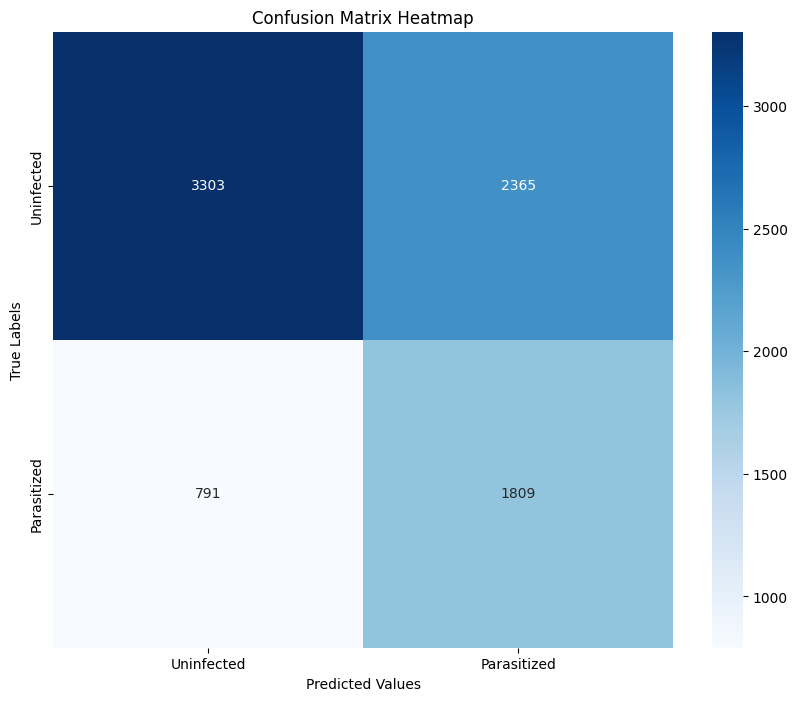

In [79]:
# confusion_dataFrame = pd.DataFrame(
#                                         conf_matrix,
#                                         index = ["Actual 0" , "Actual 1"],
#                                         columns = ["predicted 0" , "predicted 1"]
#                                     )
# print(confusion_dataFrame)

conf_matrix = confusion_matrix(Y_prediction_Knn, y_test)

import seaborn as sns
plt.figure(figsize = (10 , 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Uninfected", "Parasitized"], yticklabels=["Uninfected", "Parasitized"])
plt.xlabel("Predicted Values")
plt.ylabel("True Labels")
plt.title('Confusion Matrix Heatmap')
plt.show()

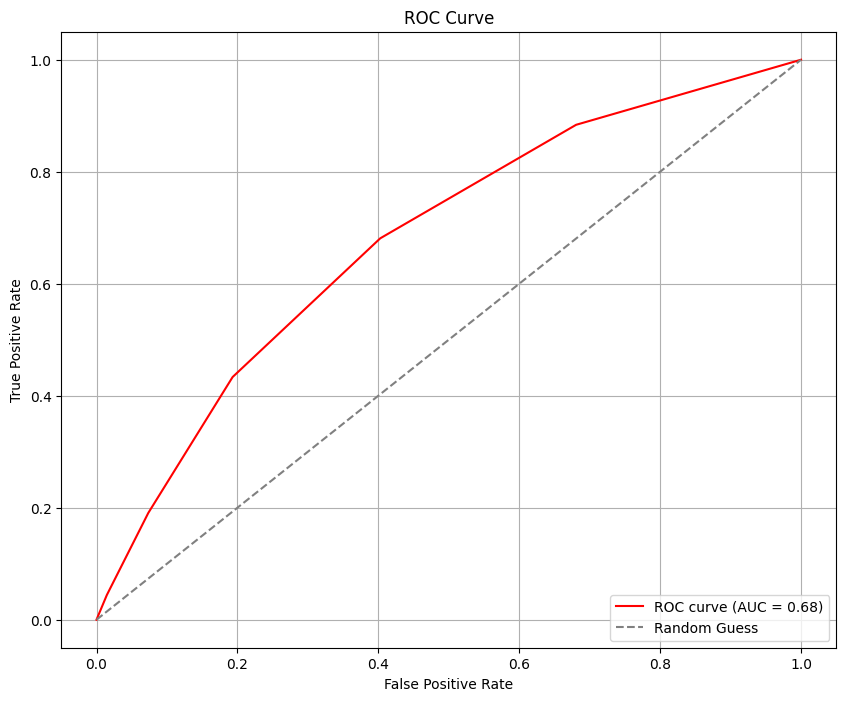

In [81]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_probability = knn.predict_proba(x_test)[:, 1]

False_Positive_Rate, True_Positive_Rate, thresholds = roc_curve(y_test, y_probability, pos_label = 1)

Roc_auc = auc(False_Positive_Rate, True_Positive_Rate)

plt.figure(figsize=(10, 8))
plt.plot(False_Positive_Rate, True_Positive_Rate, color='red', label=f'ROC curve (AUC = {Roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
